# Ford GoBike Trip Duration per Days of the week and User Type
## by Samson Adeniyi

## Investigation Overview


> In this investigation, I wanted to take a look at how the duration(secs) changes with respect to days of the week and customer type. The main focus was on hours of the day, days of the week and customer type.


## Dataset Overview

> The dataset initially contained 183412 rows and 16 columns, I indentified and dropped the missing values, reducing the number of rows to 174952. I changed the datatype of some columns to their datatypes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# data wrangling, removing rides with inconsistent or missing data, changing datatypes
ford_clean = ford.copy()

ford_clean.dropna(axis = 0, inplace = True)

dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        'user_type': 'category',
       'member_gender':'category'}

ford_clean = ford_clean.astype(dtype)

ford_clean['start_day'] = ford_clean['start_time'].dt.day_name()
ford_clean['hour'] = ford_clean['start_time'].dt.hour

day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

## Percentage of User type

> The Subscribers make up a large number of this category


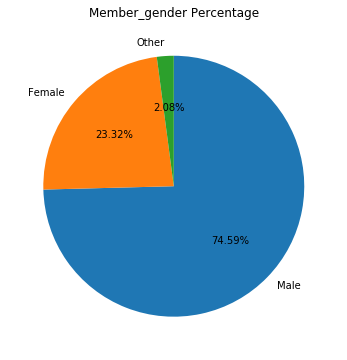

In [4]:
plt.figure(figsize=(10,6)) 
labels = ford_clean['member_gender'].value_counts().index
plt.pie(data = ford_clean, x = ford_clean['member_gender'].value_counts(), labels = labels, startangle = 90,
        counterclock = False, autopct='%1.2f%%');

plt.title('Member_gender Percentage');

## Numbers of rides Per each day of the week

> The bikes are mostly used during the weekdays, most likely by people going and coming from their jobs

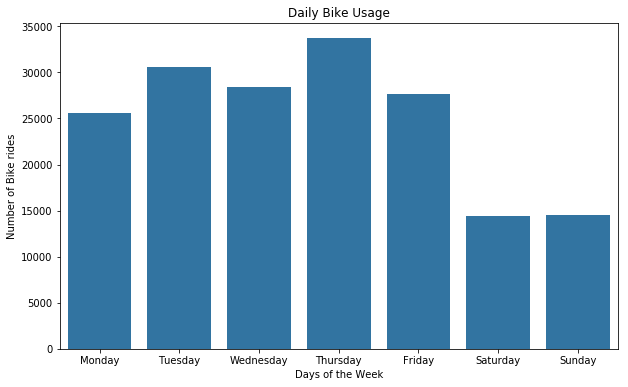

In [5]:
plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]
sb.countplot(data = ford_clean, x = 'start_day', order=day_name, color=base_color);
plt.xlabel('Days of the Week')
plt.ylabel('Number of Bike rides')
plt.title('Daily Bike Usage');

## Hours of the day when the bikes are used the most

> Bikes are used more during the 8th and 17th hour of the day which is when most people go to and come off work, respectively.



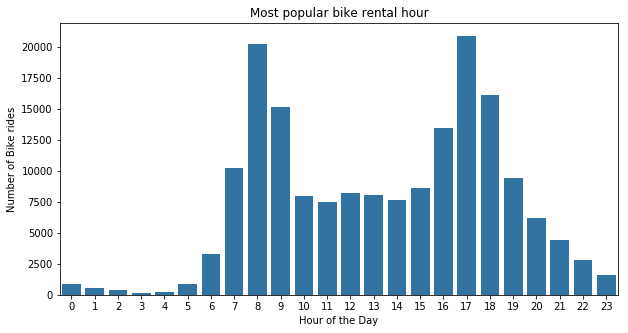

In [6]:
plt.figure(figsize=(10,5))
sb.countplot(data = ford_clean, x = 'hour', color=base_color);
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike rides')
plt.title('Most popular bike rental hour');

## The Average Duration of each usertype during the days of the week

> Even though there are more Subscribers than Customers and despite the fact that there are more rides on weekdays, The duration of rides in the weekend is significantly higer than the weekdays and Customers tend to travel more distance than the subscribers

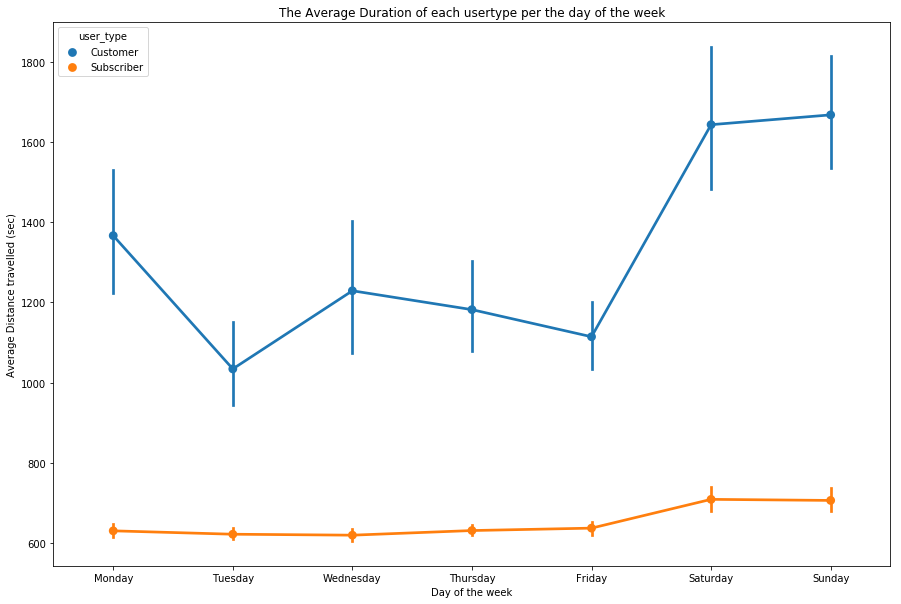

In [7]:
plt.figure(figsize=(15,10))
day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sb.pointplot(data = ford_clean, x ='start_day', y = 'duration_sec', hue = 'user_type', order = day_name);

plt.xlabel('Day of the week')
plt.ylabel('Average Distance travelled (sec)')
plt.title('The Average Duration of each usertype per the day of the week');

In [ ]:
!jupyter nbconvert Ford_Go_Data_part_II.ipynb --to slides --post serve --no-input --no-prompt